In [1]:
#The centre line of the box plot represents the median of the data, while the left boundary and the right boundary 
#denote the25% and 75% medians respectively
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')


In [2]:
cars=sns.load_dataset('mpg')
cars.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
print(cars.cylinders.value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


In [4]:
#removing the cars with odd number of cylinders:
cars=cars[cars.cylinders.isin([4,6,8])]
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<Axes: >

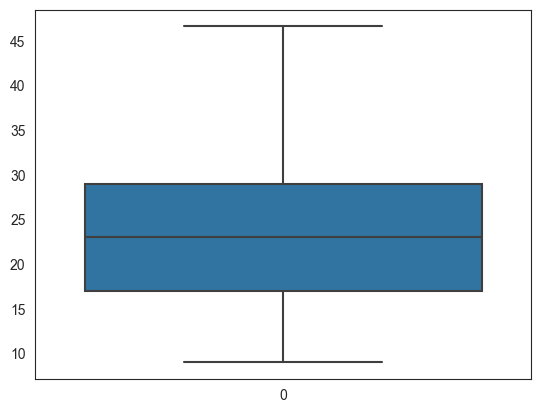

In [5]:
sns.boxplot(cars.mpg)

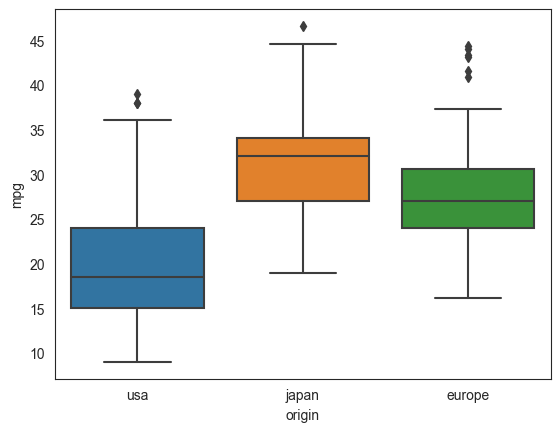

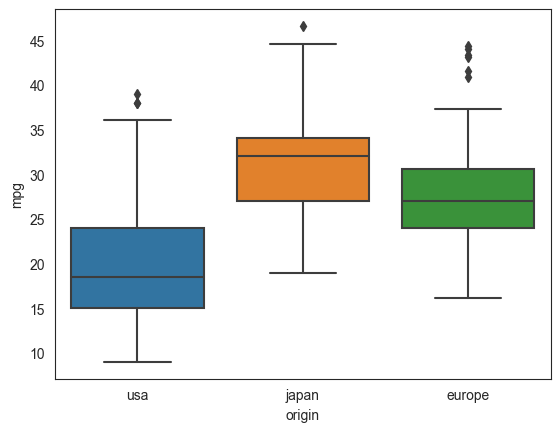

In [6]:
#plotting boxplot for categorical data
sns.boxplot(x=cars.origin,y=cars.mpg) #groups the data on the basis of the value in the x axis
plt.show()
#Alternatively, we can also write
sns.boxplot(x='origin',y='mpg',data=cars)
plt.show()


<Axes: xlabel='origin', ylabel='mpg'>

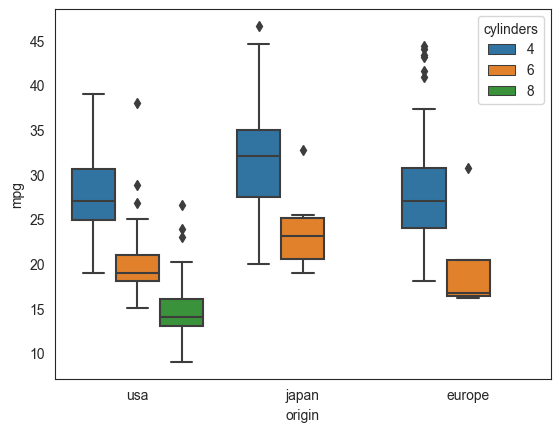

In [7]:
#Grouping the data based on 2 values:
sns.boxplot(x='origin',y='mpg',hue='cylinders',data=cars)

count    391.000000
mean      75.992327
std        3.706189
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64


<Axes: xlabel='origin', ylabel='mpg'>

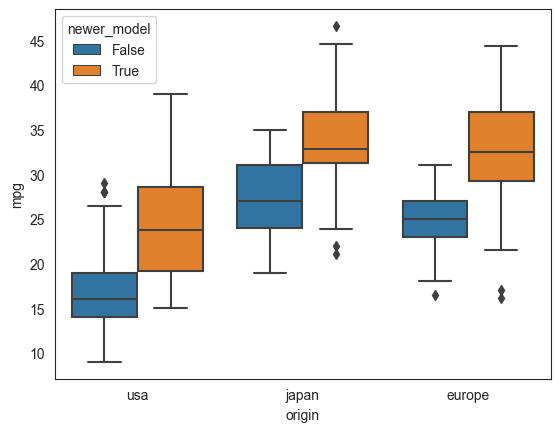

In [8]:
#We can also create new categories and then plot them 
print(cars.model_year.describe())
#here we can see that 50% of the cars were made in 1976. Now lets say we want to know whether
#the newer cars have higher mpg or the older ones(the newer ones being the ones made after 1976)
#For this, we can make a new series which defines if a car is new or old and then plot based on it

cars['newer_model']=cars.model_year>76 #this creates a boolean series having true for cars made after 1976
sns.boxplot(x='origin',y='mpg',hue='newer_model',data=cars)

STYLING THE BOX PLOTS

<Axes: xlabel='origin', ylabel='mpg'>

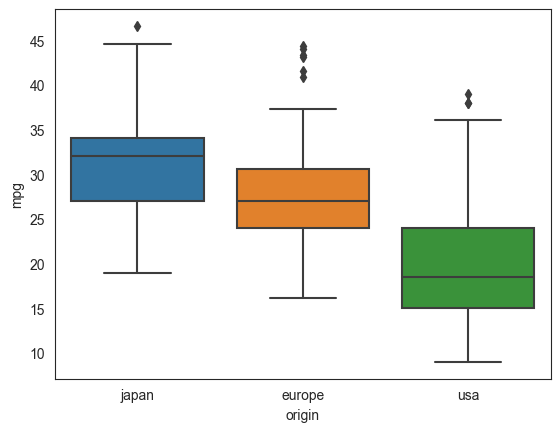

In [9]:
#we can customize the order in which the countries appear, ie we can first put japan then europe then usa as follows:
sns.boxplot(x='origin',y='mpg',order=['japan','europe','usa'],data=cars)

<Axes: xlabel='origin', ylabel='mpg'>

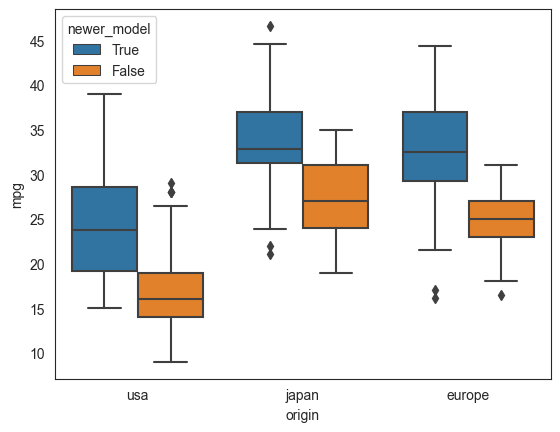

In [10]:
#Also, we can change the order of the hue values:
sns.boxplot(x='origin',y='mpg',hue='newer_model',hue_order=[True,False],data=cars)

<Axes: xlabel='origin', ylabel='mpg'>

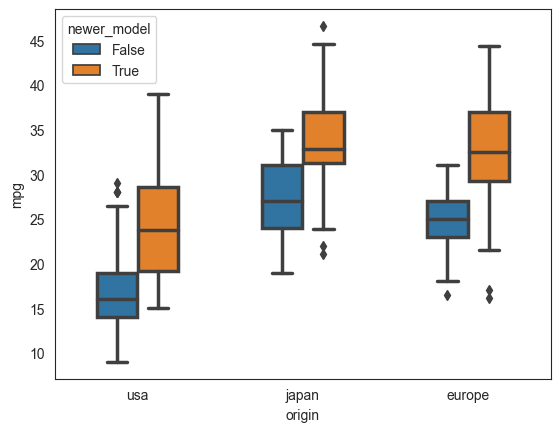

In [11]:
#Changing the width of the boxes and the lines
sns.boxplot(x='origin',y='mpg',hue='newer_model',width=0.5,linewidth=2.5,data=cars) #default width=0.8, defalt linewidth=1.5

<Axes: xlabel='origin', ylabel='mpg'>

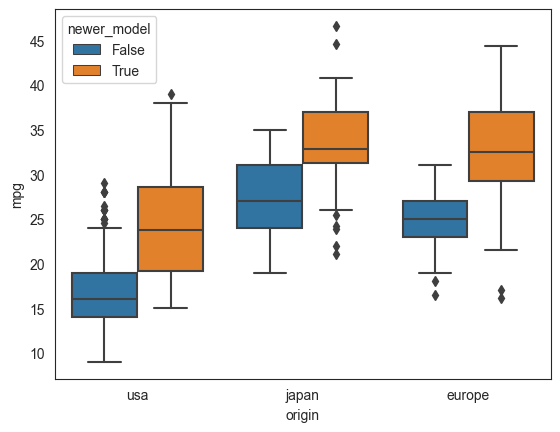

In [12]:
#To change the whiskers length:
sns.boxplot(x='origin',y='mpg',hue='newer_model',whis=1,data=cars) #note that changing the length of whiskers will
                                                                   #also change the number of outliers
                                                                   #default whisker size= 1.5

<Axes: xlabel='origin', ylabel='mpg'>

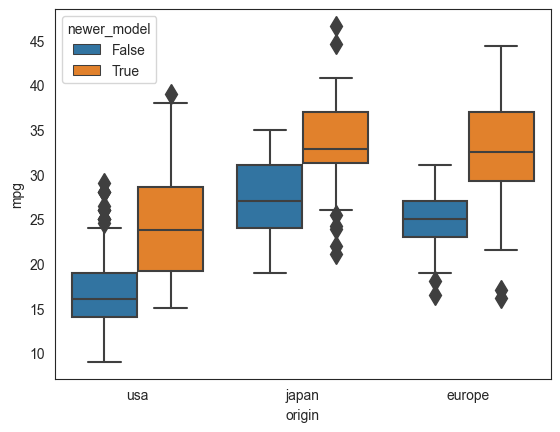

In [13]:
#To change the size of the diamond outliers
sns.boxplot(x='origin',y='mpg',hue='newer_model',whis=1,fliersize=10,data=cars) #default fliersize=5